In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
from util.similarities_util import *
from util.load_data_util import *
from util.metrics_util import *
from util.clustering_util import Louvain, Spectral
from util.visualize import *

In [245]:
f = open('paths.json')
data = json.load(f)
data_path = data['data_path']

In [144]:
G = loadData_networkX(data_path)

networkX Graph loaded. DiGraph with 5881 nodes and 35592 edges


In [226]:
g = loadData_iGraph(data_path)

iGraph Graph loaded, V: 5881 E: 35592


Negative sub-networks

In [146]:
negativeG = load_subnetwork_networkX(data_path, True)

networkX Sub-Graph loaded.


In [147]:
negativeg = load_subnetwork_iGraph(data_path, True)

iGraph Sub-Graph loaded.


In [210]:
A = np.array(g.get_adjacency(attribute='weight'))

# Similarity

In [219]:
adamic_adar_sigma = [adamic_adar_sim(A, True, True), adamic_adar_sim(A, False, True)]
print("Done Adamic Adar")
jaccard_sigma = [jaccard_sim(A, True, True), jaccard_sim(A, False, True)]
print("Done Jaccard")
# pearson_sigma = [pearson_sim(A, True, True), pearson_sim(A, False, True)]
# print("Done Pearson")
# cosine_sigma = [cosine_sim(A, True, True), cosine_sim(A, False, True)]
# print("Done Cosine")
sigmas = [adamic_adar_sigma, jaccard_sigma]


Saved File.
Saved File.
Done Adamic Adar
Saved File.
Saved File.
Done Jaccard


For verifying the similarity matrices.

In [220]:
for name, sigma in zip(['Adamic Adar', 'Jaccard'], sigmas):
    for o, s in zip(['Col/In', 'Row/Out'], sigma):
        print(f"{name} {o}: {s.shape}")
        symmetric = np.allclose(s, s.T, rtol=1e-05, atol=1e-08)
        if symmetric:
            print("\t Symmetric")
        else:
            print("\t Not Symmetric")

Adamic Adar Col/In: (5881, 5881)
	 Symmetric
Adamic Adar Row/Out: (5881, 5881)
	 Symmetric
Jaccard Col/In: (5881, 5881)
	 Symmetric
Jaccard Row/Out: (5881, 5881)
	 Symmetric


# Community Detection

## Louvain method

In [221]:
communities = {}
for name, sigma in zip(['Adamic-Adar', 'Jaccard'], sigmas):
    c = []
    for s in sigma:
        louvain = Louvain(s)
        lc, mod = louvain.run()
        c.append({"clusters": lc, "mod": mod})
    communities[name] = c

In [222]:
for name, clusters in communities.items():
    print(f"{name} Col\n\tLength: {len(clusters[0]['clusters'])}\n\tModularity: {clusters[0]['mod']}")
    print(f"{name} Row\n\tLength: {len(clusters[1]['clusters'])}\n\tModularity: {clusters[1]['mod']}")

Adamic-Adar Col
	Length: 47
	Modularity: 0.3440354200129724
Adamic-Adar Row
	Length: 1094
	Modularity: 0.28008622134763406
Jaccard Col
	Length: 16
	Modularity: 0.5150554254178183
Jaccard Row
	Length: 39
	Modularity: 0.4837627026043362


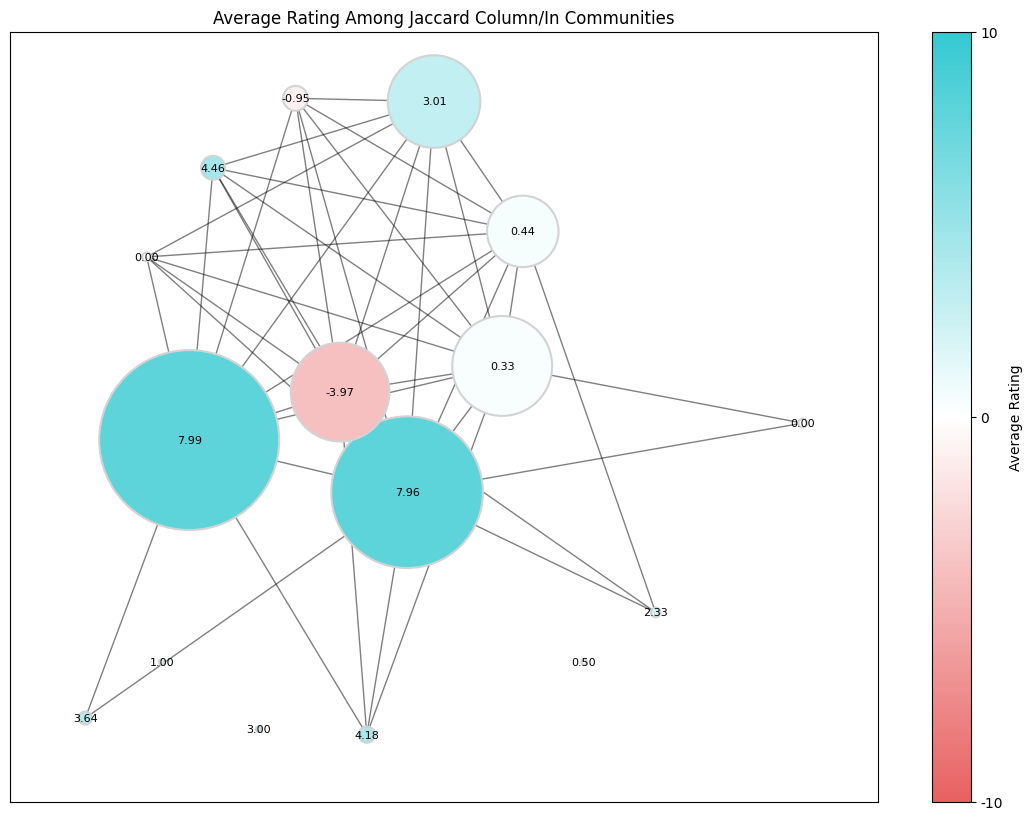

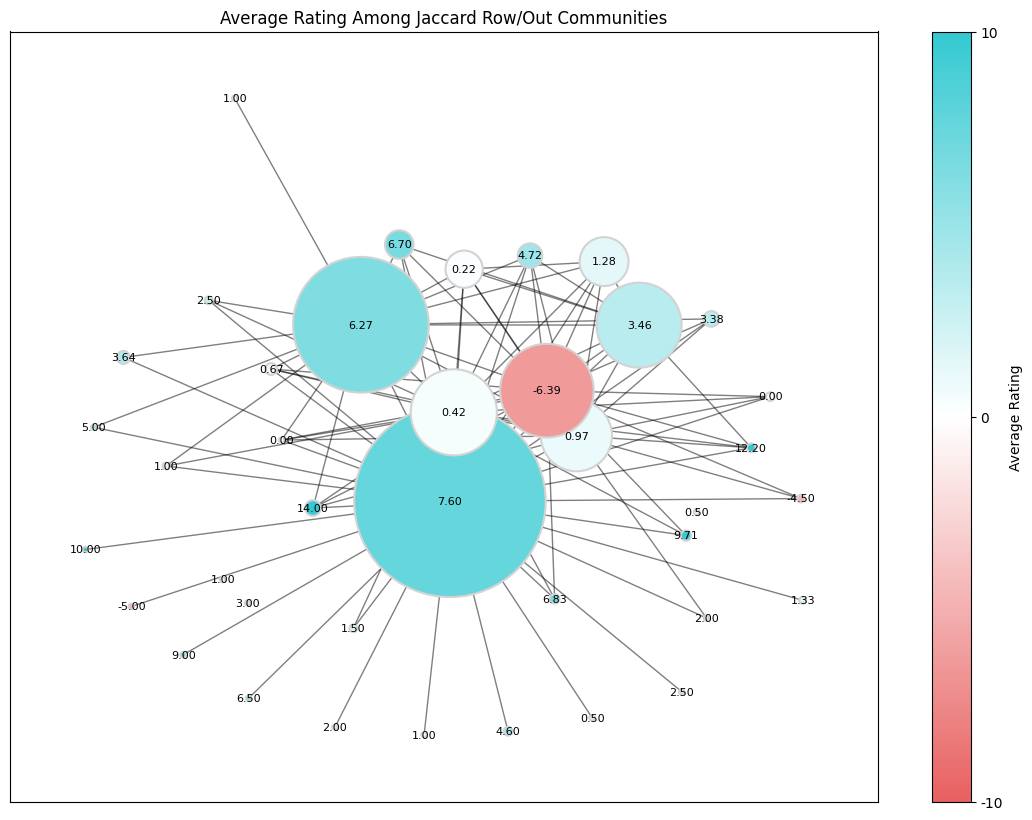

In [267]:
col_A = np.array(communities['Jaccard'][0]['clusters'].cluster_graph().get_adjacency())
col_G = nx.from_numpy_array(col_A)
col_metrics = get_anomaly_metrics(communities['Jaccard'][0]['clusters'], A, [])
avg_rep = [m['average_rating'] for m in col_metrics]
num_nodes = [len(c) for c in communities['Jaccard'][0]['clusters']]

reputation_graph(avg_rep, num_nodes, col_G, 1, "Average Rating Among Jaccard Column/In Communities", "Average Rating")

row_A = np.array(communities['Jaccard'][1]['clusters'].cluster_graph().get_adjacency())
row_G = nx.from_numpy_array(row_A)
row_metrics = get_anomaly_metrics(communities['Jaccard'][1]['clusters'], A, [])
avg_rep_r = [m['average_rating'] for m in row_metrics]
num_nodes_r = [len(c) for c in communities['Jaccard'][1]['clusters']]

reputation_graph(avg_rep_r, num_nodes_r, row_G, 2, "Average Rating Among Jaccard Row/Out Communities", "Average Rating")

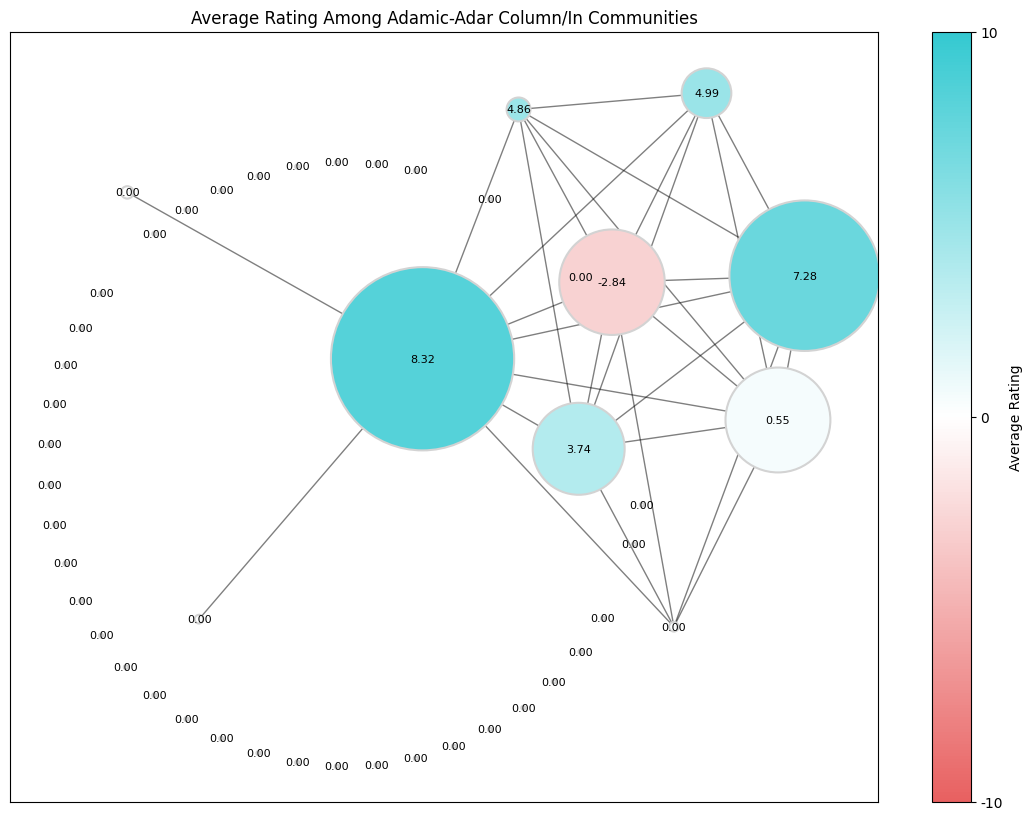

In [268]:
col_A = np.array(communities['Adamic-Adar'][0]['clusters'].cluster_graph().get_adjacency())
col_G = nx.from_numpy_array(col_A)
col_metrics = get_anomaly_metrics(communities['Adamic-Adar'][0]['clusters'], A, [])
avg_rep = [m['average_rating'] for m in col_metrics]
num_nodes = [len(c) for c in communities['Adamic-Adar'][0]['clusters']]

reputation_graph(avg_rep, num_nodes, col_G, 1, "Average Rating Among Adamic-Adar Column/In Communities", "Average Rating")

# Visualizations

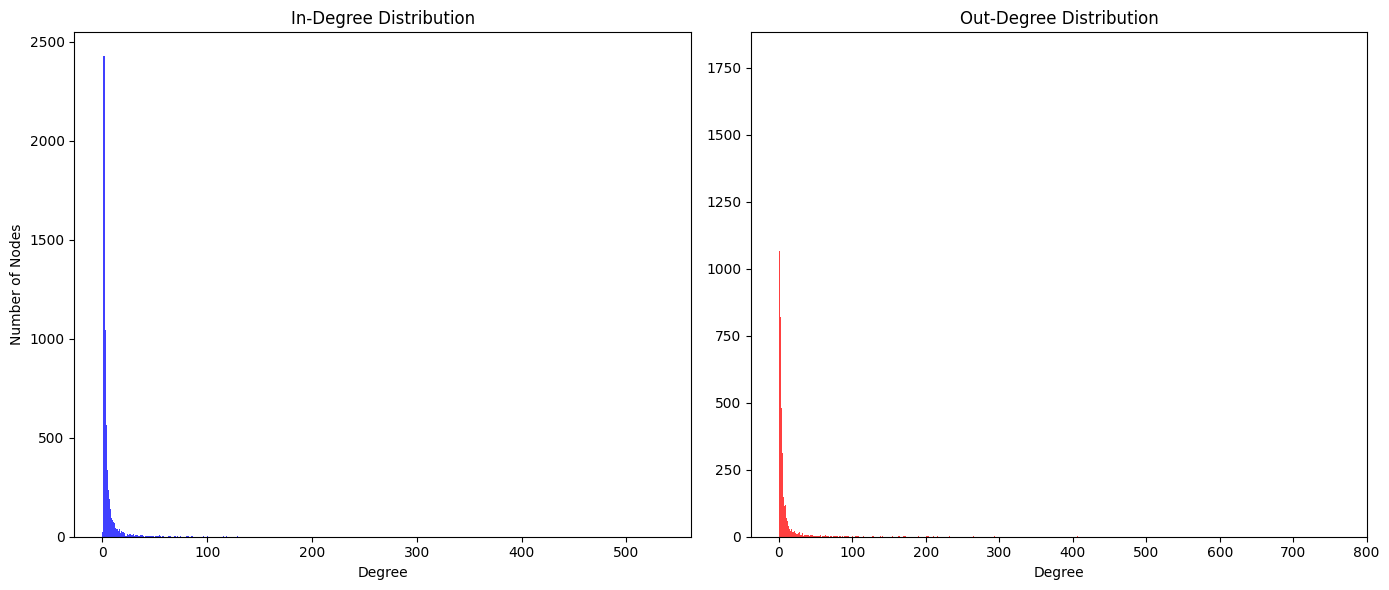

In [ ]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), alpha=0.75, color='blue')
plt.title('In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.subplot(122)
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), alpha=0.75, color='red')
plt.title('Out-Degree Distribution')
plt.xlabel('Degree')

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(15, 15))

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=5, alpha=0.1)
# nx.draw_networkx_edges(G, pos, width=2.0, alpha=1)

# nx.draw_networkx(G,node_color = 'cyan')
# plt.show()
